In [1]:
# Ukljucivanje potrebnih biblioteka
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Učitavanje dataseta
df = pd.read_csv('bank.csv', na_values=['-', ' ', ''])
display(df.head())
df.info()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction.Score,Card.Type,Point.Earned
0,Hargrave,619,France,Female,NaN,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,NaN,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             4897 non-null   object 
 1   CreditScore         4898 non-null   int64  
 2   Geography           4896 non-null   object 
 3   Gender              4898 non-null   object 
 4   Age                 4895 non-null   float64
 5   Tenure              4898 non-null   int64  
 6   Balance             4898 non-null   float64
 7   NumOfProducts       4898 non-null   int64  
 8   HasCrCard           4898 non-null   int64  
 9   IsActiveMember      4898 non-null   int64  
 10  EstimatedSalary     4898 non-null   float64
 11  Exited              4898 non-null   int64  
 12  Satisfaction.Score  4898 non-null   int64  
 13  Card.Type           4898 non-null   object 
 14  Point.Earned        4898 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 574.1+

In [3]:
# Kreiranje varijable Stayed na osnovu vrednosti varijable Exited
#Provera da li ima NA u Exited
print("Exited ima NA vrednosti:", df['Exited'].isna().any())
df['Stayed'] = np.where(df['Exited'] == 0, 'Yes', 'No')   # pozitivna klasa je Yes
#Izlazna varijabla se prebacuje u 1 i 0 zato što DecisionTreeClassifier iz scikit-learn biblioteke radi samo sa numeričkim tipovima podataka
df['Stayed'] = df['Stayed'].map({'Yes': 1, 'No': 0})
#Uklanjanje varijable Exited jer je koriscena za kreiranje izlazne varijable
df.drop(columns='Exited', inplace=True)

Exited ima NA vrednosti: False


In [4]:
#Zamena nedostajucih vrednosti
print(df['Age'].isna().sum())
df['Age'].fillna(df['Age'].median())
df = df[df['Age'] <= 87]
print(df['Age'].describe())

3
count    4894.000000
mean       38.968124
std        10.591644
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        85.000000
Name: Age, dtype: float64


In [5]:
#Zamena nedostajucih vrednosti
print("Neodostajuće vrednosti:\n", df.isna().sum())
#Varijable Surname i Geography imaju nedostajuće vrednosti
#Varijablu Surname ćemo kasnije izbaciti, jer nije relevantna za predviđanje izlazne varijable

Neodostajuće vrednosti:
 Surname               1
CreditScore           0
Geography             2
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Satisfaction.Score    0
Card.Type             0
Point.Earned          0
Stayed                0
dtype: int64


In [6]:
#Nedostajuće vrednosti varijable Geography zamenjujemo sa najčešćom vrednošću
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])
df.Geography.isnull().sum()

np.int64(0)

In [7]:
#Varijabla surname se uklanja jer nije značajna za procenu odliva klijenata
df = df.drop(columns=['Surname'])

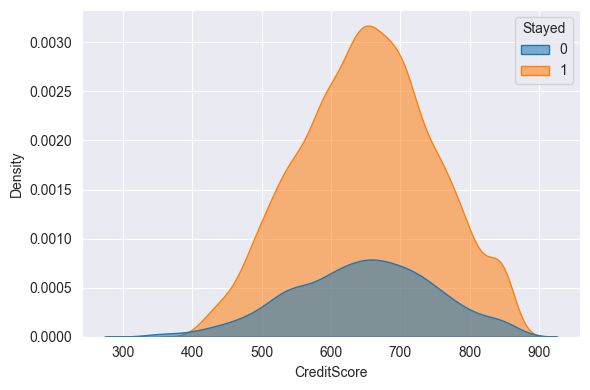

In [8]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='CreditScore', hue='Stayed', fill=True, alpha=0.55)
plt.tight_layout()
plt.show()
#Ne treba zadržati CreditScore jer se raspodele za varijablu Stayed (Yes/No) gotovo potpuno preklapaju i atribut ne doprinosi razdvajanju klasa.
df.drop(columns=['CreditScore'], inplace=True)

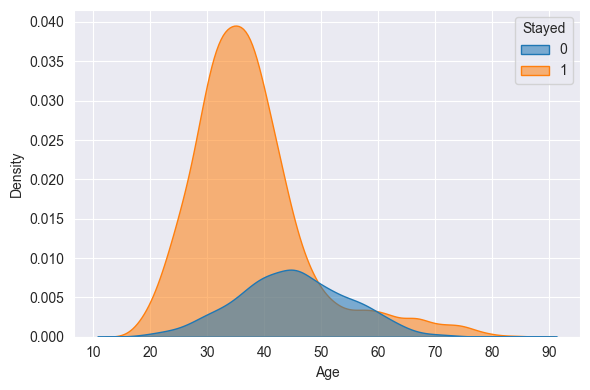

In [9]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Age', hue='Stayed', fill=True, alpha=0.55)
plt.tight_layout()
plt.show()
# Na grafiku se može videti da se vrednosti varijable Age razlikuju u pogledu izlazne varijable.Varijabla Age će se uključiti u model

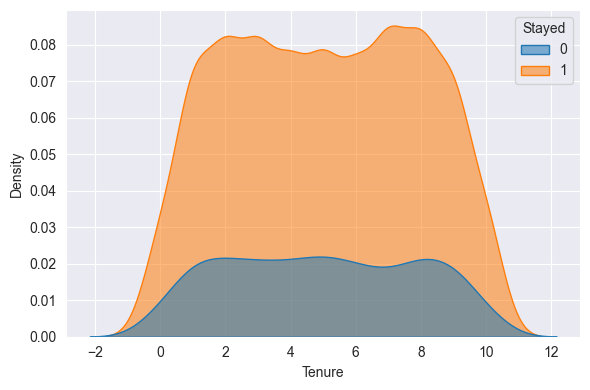

In [10]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Tenure', hue='Stayed', fill=True, alpha=0.55)
plt.tight_layout()
plt.show()
#Ne treba zadržati varijablu Tenure jer se raspodele za varijablu Stayed (Yes/No) gotovo potpuno preklapaju i atribut ne doprinosi razdvajanju klasa.
df.drop(columns=['Tenure'], inplace=True)

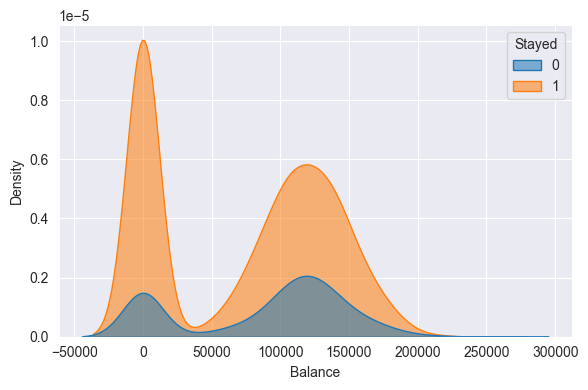

In [11]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Balance', hue='Stayed', fill=True, alpha=0.55)
plt.tight_layout()
plt.show()
#Na grafiku se može videti da se raspodela varijable Balance razlikuje za različite klase izlazne promenljive, pa će varijabla Balance biti uključena u model.

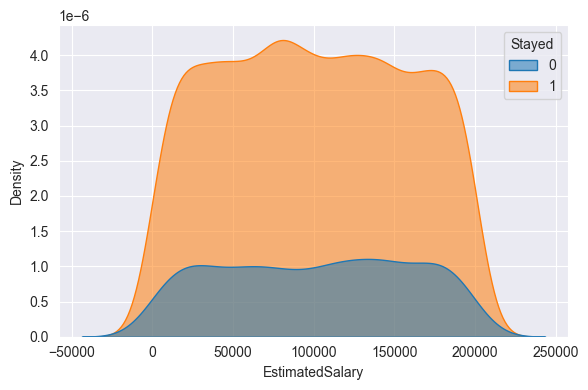

In [12]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='EstimatedSalary', hue='Stayed', fill=True, alpha=0.55)
plt.tight_layout()
plt.show()
# EstimatedSalary ne treba zadržati jer se gustinske krive za obe klase dosta poklapaju i atribut ne može doprineti razdvajanju klasa izlazne varijable.
df.drop(columns=['EstimatedSalary'], inplace=True)

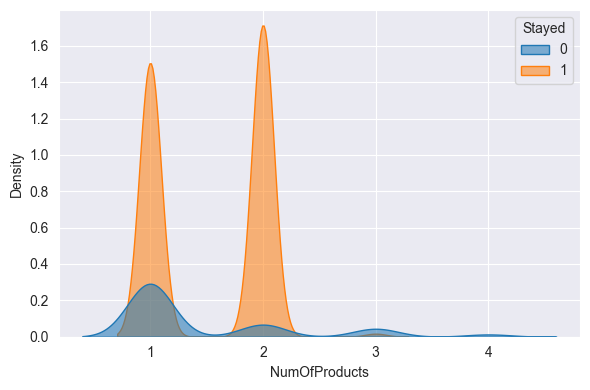

In [13]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='NumOfProducts', hue='Stayed', fill=True, alpha=0.55)
plt.tight_layout()
plt.show()
#NumOfProducts može doprineti proceni razlikovanja klijenata koji ostaju od onih koji odlaze iz banke.

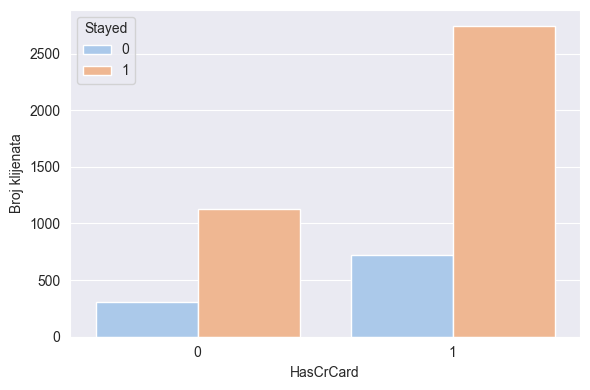

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='HasCrCard', hue='Stayed', palette='pastel')
plt.xlabel('HasCrCard')
plt.ylabel('Broj klijenata')
plt.legend(title='Stayed')
plt.tight_layout()
plt.show()
#HasCrCard ne treba zadržati jer se proporcije klijenata sa i bez kreditne kartice među onima koji ostaju i odlaze gotovo poklapaju i ne doprinosi razdvajanju klasa.
df.drop(columns=['HasCrCard'], inplace=True)

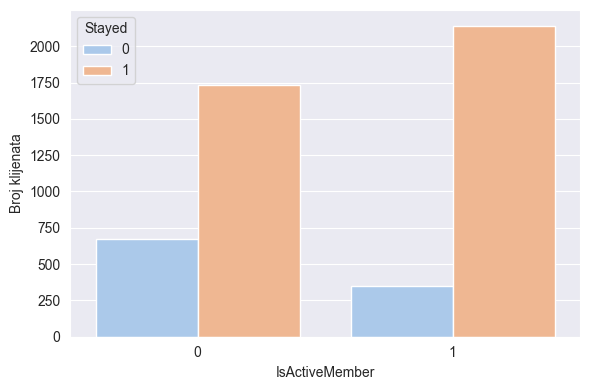

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='IsActiveMember', hue='Stayed', palette='pastel')
plt.xlabel('IsActiveMember')
plt.ylabel('Broj klijenata')
plt.legend(title='Stayed')
plt.tight_layout()
plt.show()
#Na grafiku se može videti da se proporcije klijenata sa IsActiveMember=0 i IsActiveMember=1 razlikuju u odnosu na izlaznu promenljivu, pa će varijabla IsActiveMember biti uključena u model.

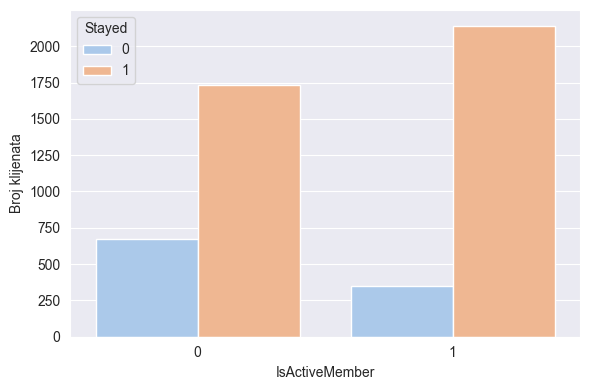

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='IsActiveMember', hue='Stayed', palette='pastel')
plt.xlabel('IsActiveMember')
plt.ylabel('Broj klijenata')
plt.legend(title='Stayed')
plt.tight_layout()
plt.show()
#Na grafiku se može videti da se proporcije klijenata sa IsActiveMember=0 i IsActiveMember=1 razlikuju u odnosu na izlaznu promenljivu, pa će varijabla IsActiveMember biti uključena u model.

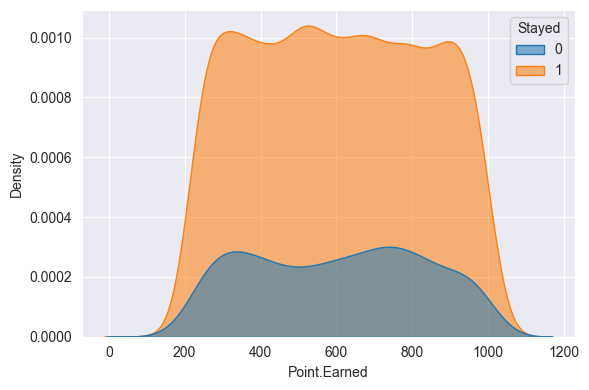

In [17]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Point.Earned', hue='Stayed', fill=True, alpha=0.55)
plt.tight_layout()
plt.show()
# Point.Earned ne treba zadržati jer se gustinske krive za obe klase dosta poklapaju i atribut ne može doprineti razdvajanju klasa izlazne varijable.
df.drop(columns=['Point.Earned'], inplace=True)

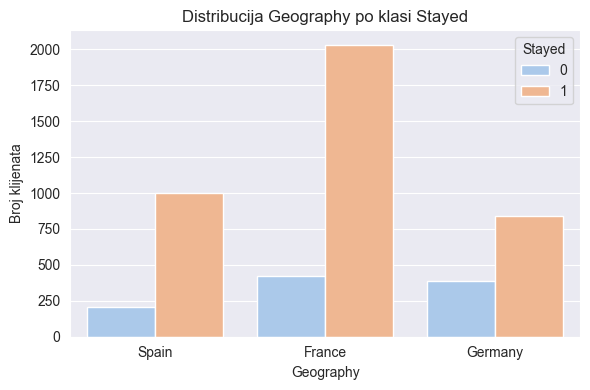

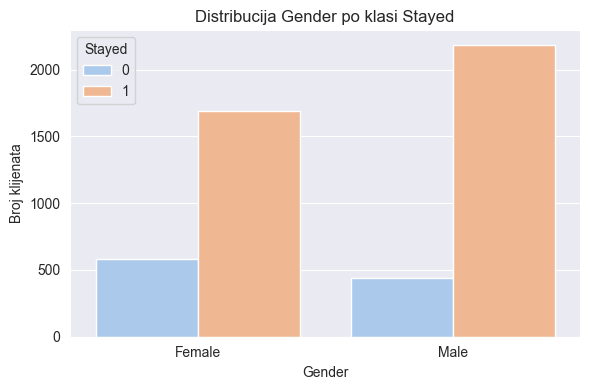

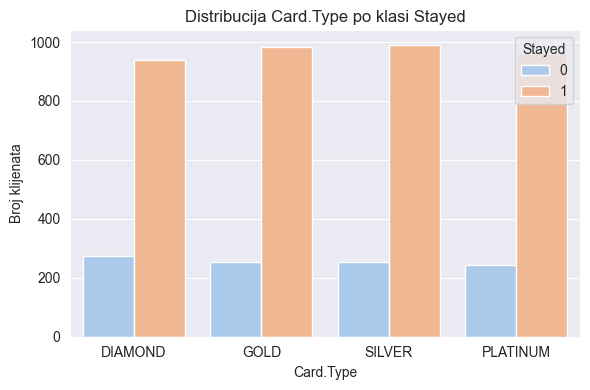

In [18]:
# Bar plotovi za Geography, Gender i Card.Type grupisani po Stayed
for col in ['Geography', 'Gender', 'Card.Type']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Stayed', palette='pastel')
    plt.title(f'Distribucija {col} po klasi Stayed')
    plt.xlabel(col)
    plt.ylabel('Broj klijenata')
    plt.legend(title='Stayed')
    plt.tight_layout()
    plt.show()

In [19]:
#Geography treba zadržati jer se proporcije za varijablu Stayed značajno razlikuju po zemljama (npr. klijenti iz Francuske ostaju u mnogo većem delu nego oni iz Španije i Nemačke).
#IsActiveMember pokazuje jasnu razliku u proporcijama Stayed/Not stayed i treba je zadržati, dok HasCrCard nema značajan doprinos.
df.drop(columns=['Card.Type'], inplace=True)

In [20]:
#Priprema podataka za ukljucivanje u model
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Index: 4894 entries, 1 to 4897
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Geography  4894 non-null   object
 1   Gender     4894 non-null   object
dtypes: object(2)
memory usage: 114.7+ KB


In [21]:
#Druge karakter varijable se procenjuju na osnovu njihovog tipa (ordinalna ili kategorička), broja različitih vrednosti i raspodele vrednosti
df_vars = df.select_dtypes(include=object).columns.tolist()
for df_var in df_vars:
    print(f"{df_var}: {df[df_var].nunique()}")
#Obe varijable imaju mali broj različitih vrednosti

Geography: 3
Gender: 2


In [22]:
df.Geography.value_counts()

df.Gender.value_counts()

Gender
Male      2622
Female    2272
Name: count, dtype: int64

In [23]:
df.Geography.value_counts()

Geography
France     2454
Germany    1231
Spain      1209
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder
#S obzirom da su varijable Geography i Gender kategoričke, koristi se One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first')
cats = ['Geography', 'Gender']
encoded_array = ohe.fit_transform(df[cats])
encoded_cols = ohe.get_feature_names_out(cats)
df_ohe = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
df = df.drop(columns=cats).join(df_ohe)

In [25]:
#Prikaz nakon enkodiranja
df.head(10)

,Age,Balance,NumOfProducts,IsActiveMember,Satisfaction.Score,Stayed,Geography_Germany,Geography_Spain,Gender_Male
1,41.0,83807.86,1,1,3,1,0.0,1.0,0.0
2,42.0,159660.80,3,0,3,0,0.0,0.0,0.0
3,39.0,0.00,2,0,5,1,0.0,0.0,0.0
4,43.0,125510.82,1,1,5,1,0.0,1.0,0.0
5,44.0,113755.78,2,0,5,0,0.0,1.0,1.0
6,50.0,0.00,2,1,2,1,0.0,0.0,1.0
7,29.0,115046.74,4,0,2,0,1.0,0.0,0.0
8,44.0,142051.07,2,1,3,1,0.0,0.0,1.0
9,27.0,134603.88,1,1,3,1,0.0,0.0,1.0
10,31.0,102016.72,2,0,3,1,0.0,0.0,1.0


In [26]:
#Podela podataka na train i test dataset
X = df.drop(columns='Stayed')
y = df['Stayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Raspodela klasa u trening i test skupu
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Stayed
1    0.791315
0    0.208685
Name: proportion, dtype: float64
Stayed
1    0.791624
0    0.208376
Name: proportion, dtype: float64


In [27]:
#Izracunavanje najbolje optimalne vrednosti parametra ccp_alpha
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv  = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {'ccp_alpha':np.arange(0.0,0.05,0.0025)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid=param_grid,
                    cv=cv,
                    scoring='accuracy')
grid.fit(X_train, y_train)
best_ccp_alpha = grid.best_params_['ccp_alpha']
print("Najbolja vrednost ccp_alpha:",best_ccp_alpha)

Najbolja vrednost ccp_alpha: 0.0025


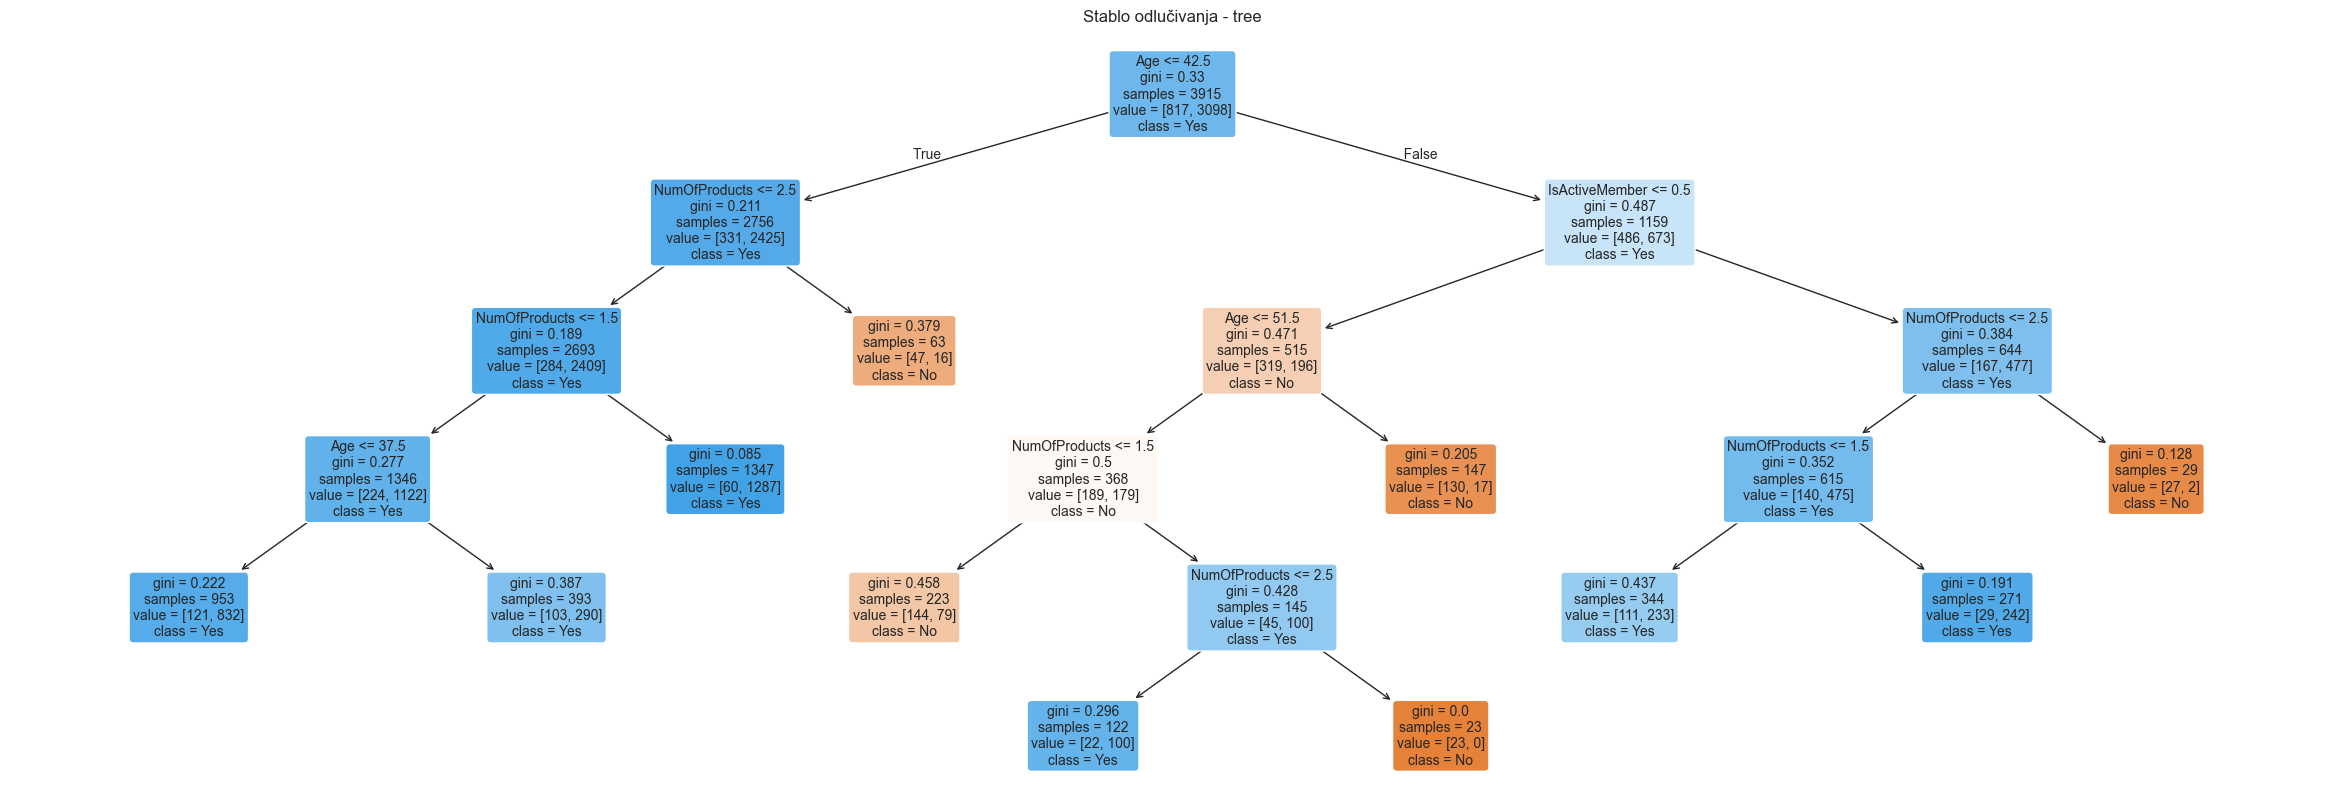

In [28]:
#Kreiranje modela stabla odlucivanja
tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha,random_state=42)
tree.fit(X_train, y_train)
# Vizualizacija stabla odlučivanja
plt.figure(figsize=[30,10])
plot_tree(tree,
          feature_names=X_train.columns,
          class_names=['No','Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Stablo odlučivanja - tree")
plt.show()

In [29]:
#Kreiranje predikcije za test skup za tree
y_pred = tree.predict(X_test)

In [30]:
#Kreiranje matrice konfuzije
cm = confusion_matrix(y_test, y_pred)
print("Matrica kofuzije:")
print(cm)
# Kreiraj DataFrame sa oznakama redova i kolona
cm_df = pd.DataFrame(cm,
                       index = ['Stvarno:No','Stvarno:Yes'],
                       columns = ['Predviđeno:No','Predviđeno:Yes'])
print(cm_df)
#U matrici konfuzije postoje  TP, TN, FP i FN:
#True-Positive(TP) - koliko klijenata smo predvideli da će ostati u banci i oni su zaista ostali - 745
#True-Negative(TN) - koliko klijenata smo predvideli da će napustiti banku i oni su je zaista napustili - 92
#False-Positive(FP) - koliko klijenata smo predvideli da će ostati u banci, a oni su je ipak napustili - 112
#False-Negative(FN) - koliko klijenata smo predvideli da će napustiti banku, a oni su ipak ostali - 30

Matrica kofuzije:
[[ 92 112]
 [ 30 745]]
             Predviđeno:No  Predviđeno:Yes
Stvarno:No              92             112
Stvarno:Yes             30             745


In [31]:
#Evaluacija performansi klasifikacionog modela stabla
def compute_basic_eval_measures(cm, model_name=""):
    from pandas import Series
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TP + TN)/cm.sum()
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    F1 = 2*precision*recall/(precision + recall)
    return Series(data=[accuracy, precision, recall, F1],
                  index=['accuracy', 'precision', 'recall', 'F1'],
                  name=model_name)

In [32]:
eval1 = compute_basic_eval_measures(cm, 'tree1')
eval1

accuracy     0.854954
precision    0.869312
recall       0.961290
F1           0.912990
Name: tree1, dtype: float64

In [33]:
#Objasnjenje dobijenih evaluacionih metrika
#Accuracy(tacnost) - Za 85.5% klijenata je tačno predviđeno da li će ostati u banci ili ne.
#Precision(preciznost) - Od svih klijenata predviđenih da će ostati u banci, 86.9% njih je stvarno ostalo.
#Recall(odziv) - Od svih klijenata koji su zaista ostali u banci, tačno je predviđeno 96.1%.
#F1 - predstavlja statisticku meru performansi modela za balansirane vrednosti precision i recall. U kontekstu zadatka, ova metrika iznosi 0.91 i pokazuje da nismo pravili mnogo grešaka u predvidjanju koliko klijenata ce ostati u banci.